In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Files/amount to open.csv')
columns = ['Industry', 'Gender_ethnicity', 'Capital_needed', 'Total_firms', 'Total_sales']
df.columns = columns
df = df.drop(columns = 'Total_sales')
df.head()

,Industry,Gender_ethnicity,Capital_needed,Total_firms
0,Total for all sectors,All firms,All firms,27626360
1,Total for all sectors,All firms,"Less than $5,000",5349989
2,Total for all sectors,All firms,"$5,000 to $9,999",1342102
3,Total for all sectors,All firms,"$10,000 to $24,999",1258060
4,Total for all sectors,All firms,"$25,000 to $49,999",767882


In [3]:
#Check data types
df.dtypes

Industry            object
Gender_ethnicity    object
Capital_needed      object
Total_firms          int64
dtype: object

In [4]:
#Create df just with all firms
new_df = df.loc[df['Industry'] == 'Total for all sectors']
new_df = new_df.loc[new_df['Gender_ethnicity'] == 'All firms']
new_df = new_df.iloc[1:]
new_df

,Industry,Gender_ethnicity,Capital_needed,Total_firms
1,Total for all sectors,All firms,"Less than $5,000",5349989
2,Total for all sectors,All firms,"$5,000 to $9,999",1342102
3,Total for all sectors,All firms,"$10,000 to $24,999",1258060
4,Total for all sectors,All firms,"$25,000 to $49,999",767882
5,Total for all sectors,All firms,"$50,000 to $99,999",664661
6,Total for all sectors,All firms,"$100,000 to $249,999",628046
7,Total for all sectors,All firms,"$250,000 to $999,999",422634
8,Total for all sectors,All firms,"$1,000,000 to $2,999,999",114022
9,Total for all sectors,All firms,"$3,000,000 or more",43746
10,Total for all sectors,All firms,Don't know,2124248


In [5]:
#Remove all firms?
df_grouped = new_df.groupby('Capital_needed').sum()
df_grouped = df_grouped.sort_values('Total_firms', ascending = False)
df_grouped['Percentage'] = round(df_grouped['Total_firms']/df_grouped.iloc[0,0]*100,2)
df_grouped

,Total_firms,Percentage
Capital_needed,,
Total reporting,16912993,100.00
"Less than $5,000",5349989,31.63
Not applicable,4197604,24.82
Don't know,2124248,12.56
"$5,000 to $9,999",1342102,7.94
"$10,000 to $24,999",1258060,7.44
"$25,000 to $49,999",767882,4.54
"$50,000 to $99,999",664661,3.93
"$100,000 to $249,999",628046,3.71


In [6]:
# Need to add a percentage column after Total_firms
df_multi_gender = df.set_index(['Gender_ethnicity', 'Capital_needed'])
df_multi_gender = df_multi_gender.loc[df_multi_gender['Industry'] == 'Total for all sectors']
df_multi_gender = df_multi_gender.drop(columns = 'Industry')
df_multi_gender

Total_firms
Gender_ethnicity                                   Capital_needed                       
All firms                                          All firms                    27626360
                                                   Less than $5,000              5349989
                                                   $5,000 to $9,999              1342102
                                                   $10,000 to $24,999            1258060
                                                   $25,000 to $49,999             767882
                                                   $50,000 to $99,999             664661
                                                   $100,000 to $249,999           628046
                                                   $250,000 to $999,999           422634
                                                   $1,000,000 to $2,999,999       114022
                                                   $3,000,000 or more              43746
                                                   Don't know                    2124248
                                                   Not applicable                4197604
                                                   Total reporting              16912993
                                                   Item not reported              610593
Female-owned                                       All firms                     9878397
                                                   Less than $5,000              2048053
                                                   $5,000 to $9,999               360415
                                                   $10,000 to $24,999             283357
                                                   $25,000 to $49,999             156851
                                                   $50,000 to $99,999             122412
                                                   $100,000 to $249,999           106166
                                                   $250,000 to $999,999            58628
                                                   $1,000,000 to $2,999,999        14598
                                                   $3,000,000 or more               6061
                                                   Don't know                     533796
                                                   Not applicable                1919225
                                                   Total reporting               5609562
                                                   Item not reported              137082
Male-owned                                         All firms                    14844597
                                                   Less than $5,000              2792620
...                                                                                  ...
Nonveteran, nonminority                            Total reporting              11670406
                                                   Item not reported              170755
All firms classifiable by gender, ethnicity, ra... All firms                    27179380
                                                   Less than $5,000              5339254
                                                   $5,000 to $9,999              1340088
                                                   $10,000 to $24,999            1256212
                                                   $25,000 to $49,999             767073
                                                   $50,000 to $99,999             664209
                                                   $100,000 to $249,999           627075
                                                   $250,000 to $999,999           421444
                                                   $1,000,000 to $2,999,999       112991
                                                   $3,000,000 or more              42266
                                                   Don't know           

In [7]:
#Female
df_female = df_multi_gender.loc[pd.IndexSlice['Female-owned',:],:]
df_female = df_female.iloc[1:]
df_female = df_female.sort_values('Total_firms', ascending = False)
df_female['Percentage'] = round(df_female['Total_firms']/df_female.iloc[0,0]*100,2)
df_female = df_female.reset_index(level = 0, drop = True)
df_female = df_female.sort_values('Capital_needed', ascending = True)
df_female

,Total_firms,Percentage
Capital_needed,,
"$1,000,000 to $2,999,999",14598,0.26
"$10,000 to $24,999",283357,5.05
"$100,000 to $249,999",106166,1.89
"$25,000 to $49,999",156851,2.80
"$250,000 to $999,999",58628,1.05
"$3,000,000 or more",6061,0.11
"$5,000 to $9,999",360415,6.43
"$50,000 to $99,999",122412,2.18
Don't know,533796,9.52


In [8]:
#Male
df_male = df_multi_gender.loc[pd.IndexSlice['Male-owned',:],:]
df_male = df_male.iloc[1:]
df_male = df_male.sort_values('Total_firms', ascending = False)
df_male['Percentage'] = round(df_male['Total_firms']/df_male.iloc[0,0]*100,2)
df_male = df_male.reset_index(level = 0, drop = True)
df_male = df_male.sort_values('Capital_needed', ascending = True)
df_male

,Total_firms,Percentage
Capital_needed,,
"$1,000,000 to $2,999,999",76516,0.82
"$10,000 to $24,999",776321,8.28
"$100,000 to $249,999",377554,4.03
"$25,000 to $49,999",469349,5.01
"$250,000 to $999,999",256902,2.74
"$3,000,000 or more",30662,0.33
"$5,000 to $9,999",810147,8.64
"$50,000 to $99,999",402865,4.30
Don't know,1328680,14.17


In [9]:
#White
df_white = df_multi_gender.loc[pd.IndexSlice['White',:],:]
df_white = df_white.iloc[1:]
df_white = df_white.sort_values('Total_firms', ascending = False)
df_white['Percentage'] = round(df_white['Total_firms']/df_white.iloc[0,0]*100,2)
df_white = df_white.reset_index(level = 0, drop = True)
df_white = df_white.sort_values('Capital_needed', ascending = True)
df_white

,Total_firms,Percentage
Capital_needed,,
"$1,000,000 to $2,999,999",102049,0.70
"$10,000 to $24,999",1069129,7.35
"$100,000 to $249,999",536526,3.69
"$25,000 to $49,999",648736,4.46
"$250,000 to $999,999",365384,2.51
"$3,000,000 or more",37168,0.26
"$5,000 to $9,999",1135606,7.81
"$50,000 to $99,999",560810,3.86
Don't know,1784962,12.27


In [10]:
#Black
df_black = df_multi_gender.loc[pd.IndexSlice['Black or African American',:],:]
df_black = df_black.iloc[1:]
df_black = df_black.sort_values('Total_firms', ascending = False)
df_black['Percentage'] = round(df_black['Total_firms']/df_black.iloc[0,0]*100,2)
df_black = df_black.reset_index(level = 0, drop = True)
df_black = df_black.sort_values('Capital_needed', ascending = True)
df_black

,Total_firms,Percentage
Capital_needed,,
"$1,000,000 to $2,999,999",570,0.07
"$10,000 to $24,999",51066,6.24
"$100,000 to $249,999",10433,1.27
"$25,000 to $49,999",23756,2.90
"$250,000 to $999,999",4841,0.59
"$3,000,000 or more",469,0.06
"$5,000 to $9,999",74912,9.15
"$50,000 to $99,999",16595,2.03
Don't know,90718,11.08


In [11]:
#Asian
df_asian = df_multi_gender.loc[pd.IndexSlice['Asian',:],:]
df_asian = df_asian.iloc[1:]
df_asian = df_asian.sort_values('Total_firms', ascending = False)
df_asian['Percentage'] = round(df_asian['Total_firms']/df_asian.iloc[0,0]*100,2)
df_asian = df_asian.reset_index(level = 0, drop = True)
df_asian = df_asian.sort_values('Capital_needed', ascending = True)
df_asian

,Total_firms,Percentage
Capital_needed,,
"$1,000,000 to $2,999,999",8712,0.79
"$10,000 to $24,999",101503,9.20
"$100,000 to $249,999",68242,6.18
"$25,000 to $49,999",74076,6.71
"$250,000 to $999,999",44537,4.04
"$3,000,000 or more",4215,0.38
"$5,000 to $9,999",90075,8.16
"$50,000 to $99,999",71445,6.47
Don't know,162245,14.70


In [12]:
#Hispanic
df_hispanic = df_multi_gender.loc[pd.IndexSlice['Hispanic',:],:]
df_hispanic = df_hispanic.iloc[1:]
df_hispanic = df_hispanic.sort_values('Total_firms', ascending = False)
df_hispanic['Percentage'] = round(df_hispanic['Total_firms']/df_hispanic.iloc[0,0]*100,2)
df_hispanic = df_hispanic.reset_index(level = 0, drop = True)
df_hispanic = df_hispanic.sort_values('Capital_needed', ascending = True)
df_hispanic

,Total_firms,Percentage
Capital_needed,,
"$1,000,000 to $2,999,999",2134,0.17
"$10,000 to $24,999",95577,7.73
"$100,000 to $249,999",22808,1.84
"$25,000 to $49,999",48531,3.92
"$250,000 to $999,999",12029,0.97
"$3,000,000 or more",1280,0.10
"$5,000 to $9,999",122265,9.88
"$50,000 to $99,999",34739,2.81
Don't know,144064,11.65


In [13]:
df_fem = df_female.drop(columns = 'Total_firms')

df_mal = df_male.drop(columns = 'Total_firms')

df_whi = df_white.drop(columns = 'Total_firms')

df_bla = df_black.drop(columns = 'Total_firms')

df_asi = df_asian.drop(columns = 'Total_firms')

df_hisp = df_hispanic.drop(columns = 'Total_firms')

dfs = [df_fem, df_mal, df_whi, df_bla, df_asi, df_hisp]

dfs_merged = pd.concat(dfs, axis=1, sort=False)
columns_merged = ['Female', 'Male', 'White', 'Black', 'Asian', 'Hispanic']
dfs_merged.columns = columns_merged
dfs_merged = dfs_merged[0:-1]
dfs_merged

,Female,Male,White,Black,Asian,Hispanic
Capital_needed,,,,,,
"$1,000,000 to $2,999,999",0.26,0.82,0.70,0.07,0.79,0.17
"$10,000 to $24,999",5.05,8.28,7.35,6.24,9.20,7.73
"$100,000 to $249,999",1.89,4.03,3.69,1.27,6.18,1.84
"$25,000 to $49,999",2.80,5.01,4.46,2.90,6.71,3.92
"$250,000 to $999,999",1.05,2.74,2.51,0.59,4.04,0.97
"$3,000,000 or more",0.11,0.33,0.26,0.06,0.38,0.10
"$5,000 to $9,999",6.43,8.64,7.81,9.15,8.16,9.88
"$50,000 to $99,999",2.18,4.30,3.86,2.03,6.47,2.81
Don't know,9.52,14.17,12.27,11.08,14.70,11.65


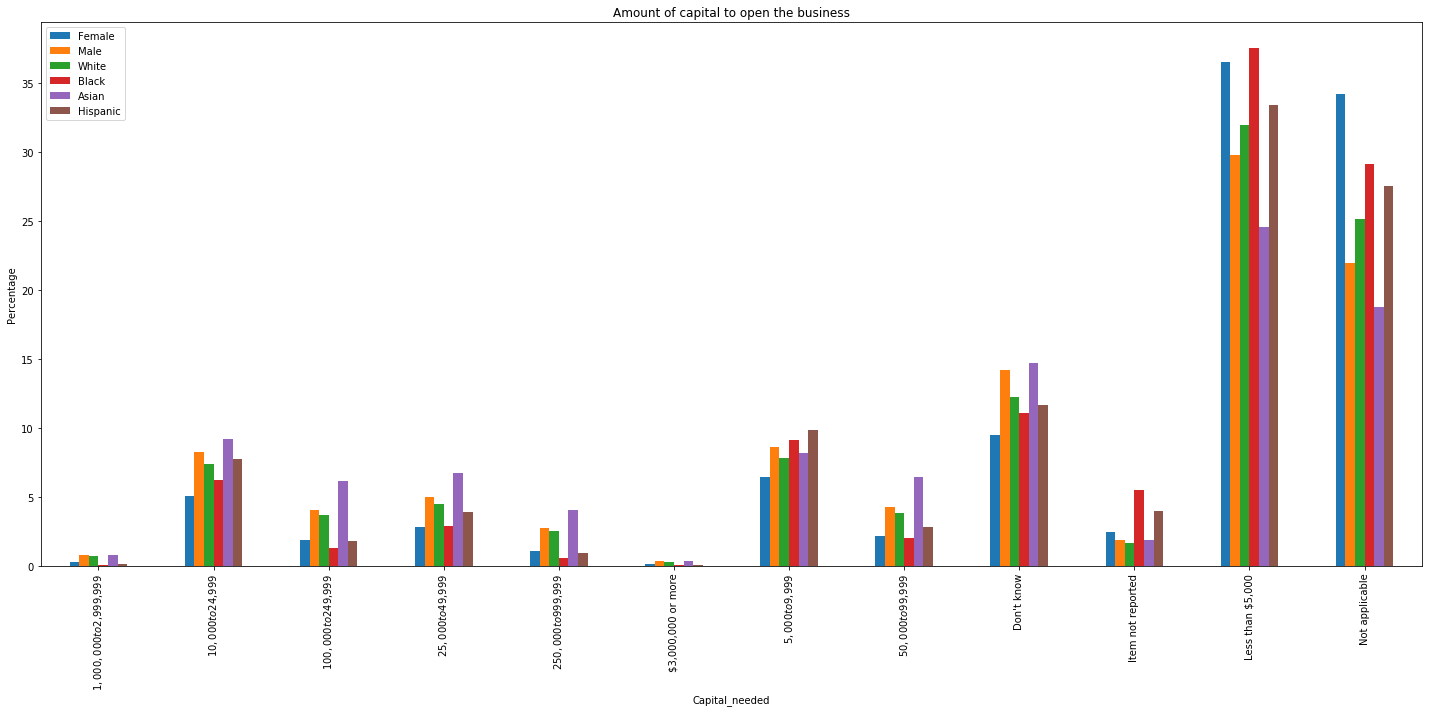

In [14]:
dfs_merged.plot(kind = 'bar', figsize = (20,10))
plt.ylabel('Percentage')
plt.title('Amount of capital to open the business')
plt.tight_layout()
plt.show()

In [15]:
# of Dataset Cost of Openning

In [16]:
# Start Dataset Sales_receipt

In [17]:
df1 = pd.read_csv('Files/business activity.csv')
columns1 = ['Industry', 'Gender_ethnicity', 'Sales_receipt', 'Operations_time', 'Total_firms', 'Total_sales']
df1.columns = columns1
df1 = df1.drop(columns = ['Total_sales', 'Operations_time'])
df1.head()

,Industry,Gender_ethnicity,Sales_receipt,Total_firms
0,Total for all sectors,All firms,All firms,27626360
1,Total for all sectors,All firms,All firms,6243094
2,Total for all sectors,All firms,All firms,1740252
3,Total for all sectors,All firms,All firms,911711
4,Total for all sectors,All firms,All firms,1717254


In [18]:
#Check data types
df1.dtypes

Industry            object
Gender_ethnicity    object
Sales_receipt       object
Total_firms          int64
dtype: object

In [19]:
#Create df just with all firms 
pd.options.display.max_rows = 100
new_df1 = df1.loc[df['Industry'] == 'Total for all sectors']
new_df1 = new_df1.loc[new_df1['Gender_ethnicity'] =='All firms']
indexes = range(0,len(new_df1)-1)
include_list1 = [i for i in indexes if i not in range(1,8)]                    
new_df1 = new_df1.iloc[include_list1,:]
new_df1

,Industry,Gender_ethnicity,Sales_receipt,Total_firms
0,Total for all sectors,All firms,All firms,27626360
8,Total for all sectors,All firms,"Firms with sales/receipts of less than $5,000",5469270
9,Total for all sectors,All firms,"Firms with sales/receipts of less than $5,000",1600174
10,Total for all sectors,All firms,"Firms with sales/receipts of less than $5,000",577863
11,Total for all sectors,All firms,"Firms with sales/receipts of less than $5,000",302339
12,Total for all sectors,All firms,"Firms with sales/receipts of less than $5,000",839165
13,Total for all sectors,All firms,"Firms with sales/receipts of less than $5,000",852950
14,Total for all sectors,All firms,"Firms with sales/receipts of less than $5,000",3239214
15,Total for all sectors,All firms,"Firms with sales/receipts of less than $5,000",48211
16,Total for all sectors,All firms,"Firms with sales/receipts of $5,000 to $9,999",3808698


In [20]:
#Remove all firms?
df_grouped1 = new_df1.groupby('Sales_receipt').sum()
df_grouped1 = df_grouped1.sort_values('Total_firms', ascending = False)
df_grouped1['Percentage'] = round(df_grouped1['Total_firms']/df_grouped1.iloc[0,0]*100,2)
df_grouped1

,Total_firms,Percentage
Sales_receipt,,
All firms,27626360,100.00
"Firms with sales/receipts of less than $5,000",12929186,46.80
"Firms with sales/receipts of $10,000 to $24,999",12649530,45.79
"Firms with sales/receipts of $5,000 to $9,999",8588075,31.09
"Firms with sales/receipts of $25,000 to $49,999",7878986,28.52
"Firms with sales/receipts of $100,000 to $249,999",6728228,24.35
"Firms with sales/receipts of $50,000 to $99,999",6483500,23.47
"Firms with sales/receipts of $250,000 to $499,999",3558871,12.88
"Firms with sales/receipts of $1,000,000 or more",3336031,12.08


In [21]:
# Need to add a percentage column after Total_firms
df_multi_gender1 = df1.set_index(['Gender_ethnicity', 'Sales_receipt'])
df_multi_gender1 = df_multi_gender1.loc[df_multi_gender1['Industry'] == 'Total for all sectors']
df_multi_gender1 = df_multi_gender1.drop(columns = 'Industry')
df_multi_gender1

Total_firms
Gender_ethnicity                                   Sales_receipt                                                 
All firms                                          All firms                                             27626360
                                                   All firms                                              6243094
                                                   All firms                                              1740252
                                                   All firms                                               911711
                                                   All firms                                              1717254
                                                   All firms                                              8919330
                                                   All firms                                             17304401
                                                   All firms                                               219185
                                                   Firms with sales/receipts of less than $5,000          5469270
                                                   Firms with sales/receipts of less than $5,000          1600174
                                                   Firms with sales/receipts of less than $5,000           577863
                                                   Firms with sales/receipts of less than $5,000           302339
                                                   Firms with sales/receipts of less than $5,000           839165
                                                   Firms with sales/receipts of less than $5,000           852950
                                                   Firms with sales/receipts of less than $5,000          3239214
                                                   Firms with sales/receipts of less than $5,000            48211
                                                   Firms with sales/receipts of $5,000 to $9,999          3808698
                                                   Firms with sales/receipts of $5,000 to $9,999          1128358
                                                   Firms with sales/receipts of $5,000 to $9,999           319001
                                                   Firms with sales/receipts of $5,000 to $9,999           155813
                                                   Firms with sales/receipts of $5,000 to $9,999           350463
                                                   Firms with sales/receipts of $5,000 to $9,999           642594
                                                   Firms with sales/receipts of $5,000 to $9,999          2149600
                                                   Firms with sales/receipts of $5,000 to $9,999            33548
                                                   Firms with sales/receipts of $10,000 to $24,999        5879871
                                                   Firms with sales/receipts of $10,000 to $24,999        1539559
                                                   Firms with sales/receipts of $10,000 to $24,999         361630
                                                   Firms with sales/receipts of $10,000 to $24,999         172340
                                                   Firms with sales/receipts of $10,000 to $24,999         302528
                                                   Firms with sales/receipts of $10,000 to $24,999        1199480
                                                   Firms with sales/receipts of $10,000 to $24,999        3141714
                                                   Firms with sales/receipts of $10,000 to $24,999          52408
                                                   Firms with sales/receipts of $25,000 to $49,999        3230034
                                                   Firms with sales/receipts of $25,000 to $49,999         86241

In [22]:
#Female
df_female1 = df_multi_gender1.loc[pd.IndexSlice['Female-owned',:],:]
df_female1 = df_female1.groupby('Sales_receipt').sum()
df_female1 = df_female1.iloc[1:]

total_female1 = df_female1['Total_firms'].sum()

new_row_female1 = {'Total_firms':[total_female1]}
row_female1 = pd.DataFrame(new_row_female1, index = ['Total'])
df_female1 = df_female1.append(row_female1)
df_female1['Percentage'] = round(df_female1['Total_firms']/df_female1.iloc[-1,0]*100,2)

df_female1

,Total_firms,Percentage
"Firms with sales/receipts of $1,000,000 or more",407319,1.84
"Firms with sales/receipts of $10,000 to $24,999",5474434,24.76
"Firms with sales/receipts of $100,000 to $249,999",1354828,6.13
"Firms with sales/receipts of $25,000 to $49,999",2555445,11.56
"Firms with sales/receipts of $250,000 to $499,999",611849,2.77
"Firms with sales/receipts of $5,000 to $9,999",3841429,17.38
"Firms with sales/receipts of $50,000 to $99,999",1684186,7.62
"Firms with sales/receipts of $500,000 to $999,999",384952,1.74
"Firms with sales/receipts of less than $5,000",5792904,26.20
Total,22107346,100.00


In [23]:
#Male
df_male1 = df_multi_gender1.loc[pd.IndexSlice['Male-owned',:],:]
df_male1 = df_male1.groupby('Sales_receipt').sum()
df_male1 = df_male1.iloc[1:]

total_male1 = df_male1['Total_firms'].sum()

new_row_male1 = {'Total_firms':[total_male1]}
row_male1 = pd.DataFrame(new_row_male1, index = ['Total'])
df_male1 = df_male1.append(row_male1)
df_male1['Percentage'] = round(df_male1['Total_firms']/df_male1.iloc[-1,0]*100,2)

df_male1

,Total_firms,Percentage
"Firms with sales/receipts of $1,000,000 or more",2271773,6.48
"Firms with sales/receipts of $10,000 to $24,999",6074795,17.33
"Firms with sales/receipts of $100,000 to $249,999",4272948,12.19
"Firms with sales/receipts of $25,000 to $49,999",4430675,12.64
"Firms with sales/receipts of $250,000 to $499,999",2283094,6.51
"Firms with sales/receipts of $5,000 to $9,999",4052691,11.56
"Firms with sales/receipts of $50,000 to $99,999",3899539,11.13
"Firms with sales/receipts of $500,000 to $999,999",1652802,4.72
"Firms with sales/receipts of less than $5,000",6112821,17.44
Total,35051138,100.00


In [24]:
#White
df_white1 = df_multi_gender1.loc[pd.IndexSlice['White',:],:]
df_white1 = df_white1.groupby('Sales_receipt').sum()
df_white1 = df_white1.iloc[1:]

total_white1 = df_white1['Total_firms'].sum()

new_row_white1 = {'Total_firms':[total_white1]}
row_white1 = pd.DataFrame(new_row_white1, index = ['Total'])
df_white1 = df_white1.append(row_white1)
df_white1['Percentage'] = round(df_white1['Total_firms']/df_white1.iloc[-1,0]*100,2)

df_white1

,Total_firms,Percentage
"Firms with sales/receipts of $1,000,000 or more",2757653,5.21
"Firms with sales/receipts of $10,000 to $24,999",9740012,18.40
"Firms with sales/receipts of $100,000 to $249,999",5720916,10.81
"Firms with sales/receipts of $25,000 to $49,999",6634151,12.54
"Firms with sales/receipts of $250,000 to $499,999",2995650,5.66
"Firms with sales/receipts of $5,000 to $9,999",6771714,12.80
"Firms with sales/receipts of $50,000 to $99,999",5546973,10.48
"Firms with sales/receipts of $500,000 to $999,999",2110422,3.99
"Firms with sales/receipts of less than $5,000",10646100,20.12
Total,52923591,100.00


In [25]:
#Black
df_black1 = df_multi_gender1.loc[pd.IndexSlice['Black or African American',:],:]
df_black1 = df_black1.groupby('Sales_receipt').sum()
df_black1 = df_black1.iloc[1:]

total_black1 = df_black1['Total_firms'].sum()

new_row_black1 = {'Total_firms':[total_black1]}
row_black1 = pd.DataFrame(new_row_black1, index = ['Total'])
df_black1 = df_black1.append(row_black1)
df_black1['Percentage'] = round(df_black1['Total_firms']/df_black1.iloc[-1,0]*100,2)

df_black1

,Total_firms,Percentage
"Firms with sales/receipts of $1,000,000 or more",37062,0.84
"Firms with sales/receipts of $10,000 to $24,999",1394147,31.71
"Firms with sales/receipts of $100,000 to $249,999",167320,3.81
"Firms with sales/receipts of $25,000 to $49,999",402883,9.16
"Firms with sales/receipts of $250,000 to $499,999",61648,1.40
"Firms with sales/receipts of $5,000 to $9,999",868846,19.76
"Firms with sales/receipts of $50,000 to $99,999",220479,5.02
"Firms with sales/receipts of $500,000 to $999,999",36403,0.83
"Firms with sales/receipts of less than $5,000",1207230,27.46
Total,4396018,100.00


In [26]:
#Asian
df_asian1 = df_multi_gender1.loc[pd.IndexSlice['Asian',:],:]
df_asian1 = df_asian1.groupby('Sales_receipt').sum()
df_asian1 = df_asian1.iloc[1:]

total_asian1 = df_asian1['Total_firms'].sum()

new_row_asian1 = {'Total_firms':[total_asian1]}
row_asian1 = pd.DataFrame(new_row_asian1, index = ['Total'])
df_asian1 = df_asian1.append(row_asian1)
df_asian1['Percentage'] = round(df_asian1['Total_firms']/df_asian1.iloc[-1,0]*100,2)

df_asian1

,Total_firms,Percentage
"Firms with sales/receipts of $1,000,000 or more",232561,5.46
"Firms with sales/receipts of $10,000 to $24,999",818922,19.23
"Firms with sales/receipts of $100,000 to $249,999",540685,12.70
"Firms with sales/receipts of $25,000 to $49,999",513677,12.06
"Firms with sales/receipts of $250,000 to $499,999",304462,7.15
"Firms with sales/receipts of $5,000 to $9,999",551576,12.95
"Firms with sales/receipts of $50,000 to $99,999",458574,10.77
"Firms with sales/receipts of $500,000 to $999,999",211144,4.96
"Firms with sales/receipts of less than $5,000",627425,14.73
Total,4259026,100.00


In [27]:
#Hispanic
df_hispanic1 = df_multi_gender1.loc[pd.IndexSlice['Hispanic',:],:]
df_hispanic1 = df_hispanic1.groupby('Sales_receipt').sum()
df_hispanic1 = df_hispanic1.iloc[1:]

total_hispanic1 = df_hispanic1['Total_firms'].sum()

new_row_hispanic1 = {'Total_firms':[total_hispanic1]}
row_hispanic1= pd.DataFrame(new_row_hispanic1, index = ['Total'])
df_hispanic1 = df_hispanic1.append(row_hispanic1)
df_hispanic1['Percentage'] = round(df_hispanic1['Total_firms']/df_hispanic1.iloc[-1,0]*100,2)

df_hispanic1

,Total_firms,Percentage
"Firms with sales/receipts of $1,000,000 or more",120905,2.02
"Firms with sales/receipts of $10,000 to $24,999",1721818,28.75
"Firms with sales/receipts of $100,000 to $249,999",449220,7.50
"Firms with sales/receipts of $25,000 to $49,999",725840,12.12
"Firms with sales/receipts of $250,000 to $499,999",190300,3.18
"Firms with sales/receipts of $5,000 to $9,999",1018513,17.01
"Firms with sales/receipts of $50,000 to $99,999",476249,7.95
"Firms with sales/receipts of $500,000 to $999,999",120869,2.02
"Firms with sales/receipts of less than $5,000",1165407,19.46
Total,5989121,100.00


In [28]:
df_fem1 = df_female1.drop(columns = 'Total_firms')

df_mal1 = df_male1.drop(columns = 'Total_firms')

df_whi1 = df_white1.drop(columns = 'Total_firms')

df_bla1 = df_black1.drop(columns = 'Total_firms')

df_asi1 = df_asian1.drop(columns = 'Total_firms')

df_hisp1 = df_hispanic1.drop(columns = 'Total_firms')

dfs1 = [df_fem1, df_mal1, df_whi1, df_bla1, df_asi1, df_hisp1]

dfs_merged1 = pd.concat(dfs1, axis=1, sort=False)
columns_merged1 = ['Female', 'Male', 'White', 'Black', 'Asian', 'Hispanic']
dfs_merged1.columns = columns_merged1
dfs_merged1= dfs_merged1[0:-1]
dfs_merged1

,Female,Male,White,Black,Asian,Hispanic
"Firms with sales/receipts of $1,000,000 or more",1.84,6.48,5.21,0.84,5.46,2.02
"Firms with sales/receipts of $10,000 to $24,999",24.76,17.33,18.40,31.71,19.23,28.75
"Firms with sales/receipts of $100,000 to $249,999",6.13,12.19,10.81,3.81,12.70,7.50
"Firms with sales/receipts of $25,000 to $49,999",11.56,12.64,12.54,9.16,12.06,12.12
"Firms with sales/receipts of $250,000 to $499,999",2.77,6.51,5.66,1.40,7.15,3.18
"Firms with sales/receipts of $5,000 to $9,999",17.38,11.56,12.80,19.76,12.95,17.01
"Firms with sales/receipts of $50,000 to $99,999",7.62,11.13,10.48,5.02,10.77,7.95
"Firms with sales/receipts of $500,000 to $999,999",1.74,4.72,3.99,0.83,4.96,2.02
"Firms with sales/receipts of less than $5,000",26.20,17.44,20.12,27.46,14.73,19.46


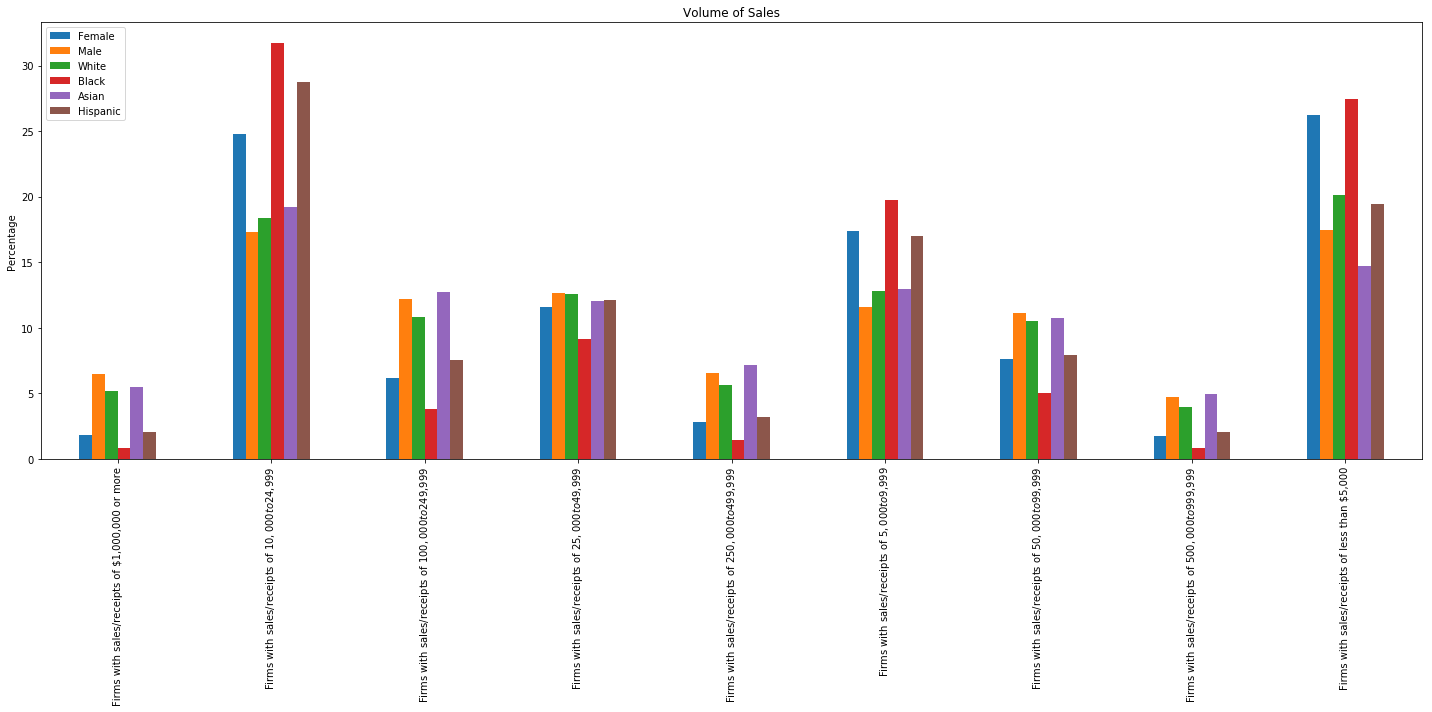

In [29]:
dfs_merged1.plot(kind = 'bar', figsize = (20,10))
plt.ylabel('Percentage')
plt.title('Volume of Sales')
plt.tight_layout()
plt.savefig('example1.png')
plt.show()

In [30]:
# End for Dataset Sales_Receipt

In [31]:
# Start Source_of_Capital

In [32]:
df2 = pd.read_csv('Files/source of capital.csv')
columns2 = ['Industry', 'Gender_ethnicity', 'Source', 'Total_firms', 'Total_sales']
df2.columns = columns2
df2 = df2.drop(columns = 'Total_sales')
df2.head()

,Industry,Gender_ethnicity,Source,Total_firms
0,Total for all sectors,All firms,All firms,27626360
1,Total for all sectors,All firms,Personal/family savings of owner(s),9673423
2,Total for all sectors,All firms,Personal/family assets other than savings of o...,994146
3,Total for all sectors,All firms,Personal/family home equity loan,528053
4,Total for all sectors,All firms,Personal credit card(s) carrying balances,1278286


In [33]:
#Check data types
df2.dtypes

Industry            object
Gender_ethnicity    object
Source              object
Total_firms         object
dtype: object

In [34]:
#Check the column
df2['Total_firms'].unique()

array(['27626360', '9673423', '994146', ..., '4795', '1284(r)', '69(r)'],
      dtype=object)

In [35]:
#Convert to int
df2['Total_firms'] = df2['Total_firms'].str.replace(r"\(.*\)","")
df2['Total_firms'] = pd.to_numeric(df2['Total_firms'])

In [36]:
#Check if col was converted
df2.dtypes

Industry            object
Gender_ethnicity    object
Source              object
Total_firms          int64
dtype: object

In [37]:
#Create df just with all firms
new_df2 = df2.loc[df2['Industry'] == 'Total for all sectors']
new_df2 = new_df2.loc[new_df2['Gender_ethnicity'] == 'All firms']
new_df2 = new_df2.iloc[1:]
new_df2

,Industry,Gender_ethnicity,Source,Total_firms
1,Total for all sectors,All firms,Personal/family savings of owner(s),9673423
2,Total for all sectors,All firms,Personal/family assets other than savings of o...,994146
3,Total for all sectors,All firms,Personal/family home equity loan,528053
4,Total for all sectors,All firms,Personal credit card(s) carrying balances,1278286
5,Total for all sectors,All firms,Business credit card(s) carrying balances,403791
6,Total for all sectors,All firms,"Business loan from federal, state, or local go...",27975
7,Total for all sectors,All firms,Government-guaranteed business loan from a ban...,106647
8,Total for all sectors,All firms,Business loan from a bank or financial institu...,1268875
9,Total for all sectors,All firms,Business loan/investment from family/friends,312658
10,Total for all sectors,All firms,Investment by venture capitalist(s),39181


In [38]:
#Remove all firms?
df_grouped2 = new_df2.groupby('Source').sum()
df_grouped2 = df_grouped2.sort_values('Total_firms', ascending = False)
df_grouped2['Percentage'] = round(df_grouped2['Total_firms']/df_grouped2.iloc[0,0]*100,2)
df_grouped2

,Total_firms,Percentage
Source,,
Total reporting,16795048,100.00
Personal/family savings of owner(s),9673423,57.60
None needed,4197604,24.99
Personal credit card(s) carrying balances,1278286,7.61
Business loan from a bank or financial institution,1268875,7.56
Don't know,1174748,6.99
Personal/family assets other than savings of owner(s),994146,5.92
Item not reported,728538,4.34
Personal/family home equity loan,528053,3.14


In [39]:
# Need to add a percentage column after Total_firms
df_multi_gender2 = df2.set_index(['Gender_ethnicity', 'Source'])
df_multi_gender2 = df_multi_gender2.loc[df_multi_gender2['Industry'] == 'Total for all sectors']
df_multi_gender2 = df_multi_gender2.drop(columns = 'Industry')
df_multi_gender2

Total_firms
Gender_ethnicity                                   Source                                                         
All firms                                          All firms                                              27626360
                                                   Personal/family savings of owner(s)                     9673423
                                                   Personal/family assets other than savings of ow...       994146
                                                   Personal/family home equity loan                         528053
                                                   Personal credit card(s) carrying balances               1278286
                                                   Business credit card(s) carrying balances                403791
                                                   Business loan from federal, state, or local gov...        27975
                                                   Government-guaranteed business loan from a bank...       106647
                                                   Business loan from a bank or financial institution      1268875
                                                   Business loan/investment from family/friends             312658
                                                   Investment by venture capitalist(s)                       39181
                                                   Grants                                                    34629
                                                   Other source(s) of capital                               318678
                                                   Don't know                                              1174748
                                                   None needed                                             4197604
                                                   Total reporting                                        16795048
                                                   Item not reported                                        728538
Female-owned                                       All firms                                               9878397
                                                   Personal/family savings of owner(s)                     2872315
                                                   Personal/family assets other than savings of ow...       252125
                                                   Personal/family home equity loan                         114947
                                                   Personal credit card(s) carrying balances                410688
                                                   Business credit card(s) carrying balances                107824
                                                   Business loan from federal, state, or local gov...         6977
                                                   Government-guaranteed business loan from a bank...        22743
                                                   Business loan from a bank or financial institution       200248
                                                   Business loan/investment from family/friends              71884
                                                   Investment by venture capitalist(s)                        5383
                                                   Grants                                                    16533
                                                   Other source(s) of capital                                80004
                                                   Don't know                                               314429
                                                   None needed                                             1919225
                                                   Total reporting                                         5557811
                                                   Item not reported          

In [40]:
#Female
df_female2 = df_multi_gender2.loc[pd.IndexSlice['Female-owned',:],:]
df_female2 = df_female2.iloc[1:]
df_female2 = df_female2.sort_values('Total_firms', ascending = False)
df_female2['Percentage'] = round(df_female2['Total_firms']/df_female2.iloc[0,0]*100,2)
df_female2 = df_female2.reset_index(level = 0, drop = True)
df_female2 = df_female2.sort_values('Source', ascending = True)
df_female2

,Total_firms,Percentage
Source,,
Business credit card(s) carrying balances,107824,1.94
Business loan from a bank or financial institution,200248,3.60
"Business loan from federal, state, or local government",6977,0.13
Business loan/investment from family/friends,71884,1.29
Don't know,314429,5.66
Government-guaranteed business loan from a bank or financial institution,22743,0.41
Grants,16533,0.30
Investment by venture capitalist(s),5383,0.10
Item not reported,188834,3.40


In [41]:
#Male
df_male2 = df_multi_gender2.loc[pd.IndexSlice['Male-owned',:],:]
df_male2 = df_male2.iloc[1:]
df_male2 = df_male2.sort_values('Total_firms', ascending = False)
df_male2['Percentage'] = round(df_male2['Total_firms']/df_male2.iloc[0,0]*100,2)
df_male2 = df_male2.reset_index(level = 0, drop = True)
df_male2 = df_male2.sort_values('Source', ascending = True)
df_male2

,Total_firms,Percentage
Source,,
Business credit card(s) carrying balances,230506,2.47
Business loan from a bank or financial institution,793130,8.50
"Business loan from federal, state, or local government",14289,0.15
Business loan/investment from family/friends,180969,1.94
Don't know,748670,8.03
Government-guaranteed business loan from a bank or financial institution,56104,0.60
Grants,14371,0.15
Investment by venture capitalist(s),28203,0.30
Item not reported,227548,2.44


In [42]:
#White
df_white2 = df_multi_gender2.loc[pd.IndexSlice['White',:],:]
df_white2 = df_white2.iloc[1:]
df_white2 = df_white2.sort_values('Total_firms', ascending = False)
df_white2['Percentage'] = round(df_white2['Total_firms']/df_white2.iloc[0,0]*100,2)
df_white2 = df_white2.reset_index(level = 0, drop = True)
df_white2 = df_white2.sort_values('Source', ascending = True)
df_white2

,Total_firms,Percentage
Source,,
Business credit card(s) carrying balances,351632,2.43
Business loan from a bank or financial institution,1139509,7.88
"Business loan from federal, state, or local government",23292,0.16
Business loan/investment from family/friends,263433,1.82
Don't know,949301,6.57
Government-guaranteed business loan from a bank or financial institution,91158,0.63
Grants,26849,0.19
Investment by venture capitalist(s),33458,0.23
Item not reported,330141,2.28


In [43]:
#Black
df_black2 = df_multi_gender2.loc[pd.IndexSlice['Black or African American',:],:]
df_black2 = df_black2.iloc[1:]
df_black2 = df_black2.sort_values('Total_firms', ascending = False)
df_black2['Percentage'] = round(df_black2['Total_firms']/df_black2.iloc[0,0]*100,2)
df_black2 = df_black2.reset_index(level = 0, drop = True)
df_black2 = df_black2.sort_values('Source', ascending = True)
df_black2

,Total_firms,Percentage
Source,,
Business credit card(s) carrying balances,16801,2.08
Business loan from a bank or financial institution,26442,3.27
"Business loan from federal, state, or local government",1340,0.17
Business loan/investment from family/friends,9167,1.13
Don't know,55658,6.89
Government-guaranteed business loan from a bank or financial institution,3851,0.48
Grants,4024,0.50
Investment by venture capitalist(s),1168,0.14
Item not reported,55037,6.81


In [44]:
#Asian
df_asian2 = df_multi_gender2.loc[pd.IndexSlice['Asian',:],:]
df_asian2 = df_asian2.iloc[1:]
df_asian2 = df_asian2.sort_values('Total_firms', ascending = False)
df_asian2['Percentage'] = round(df_asian2['Total_firms']/df_asian2.iloc[0,0]*100,2)
df_asian2 = df_asian2.reset_index(level = 0, drop = True)
df_asian2 = df_asian2.sort_values('Source', ascending = True)
df_asian2

,Total_firms,Percentage
Source,,
Business credit card(s) carrying balances,26507,2.41
Business loan from a bank or financial institution,77129,7.02
"Business loan from federal, state, or local government",2321,0.21
Business loan/investment from family/friends,32116,2.92
Don't know,109552,9.97
Government-guaranteed business loan from a bank or financial institution,8580,0.78
Grants,2564,0.23
Investment by venture capitalist(s),2812,0.26
Item not reported,25460,2.32


In [45]:
#Hispanic
df_hispanic2 = df_multi_gender2.loc[pd.IndexSlice['Hispanic',:],:]
df_hispanic2 = df_hispanic2.iloc[1:]
df_hispanic2 = df_hispanic2.sort_values('Total_firms', ascending = False)
df_hispanic2['Percentage'] = round(df_hispanic2['Total_firms']/df_hispanic2.iloc[0,0]*100,2)
df_hispanic2 = df_hispanic2.reset_index(level = 0, drop = True)
df_hispanic2 = df_hispanic2.sort_values('Source', ascending = True)
df_hispanic2

,Total_firms,Percentage
Source,,
Business credit card(s) carrying balances,27477,2.24
Business loan from a bank or financial institution,44512,3.64
"Business loan from federal, state, or local government",1388,0.11
Business loan/investment from family/friends,19057,1.56
Don't know,92333,7.54
Government-guaranteed business loan from a bank or financial institution,4932,0.40
Grants,2819,0.23
Investment by venture capitalist(s),2648,0.22
Item not reported,62200,5.08


In [46]:
df_fem2 = df_female2.drop(columns = 'Total_firms')

df_mal2 = df_male2.drop(columns = 'Total_firms')

df_whi2 = df_white2.drop(columns = 'Total_firms')

df_bla2 = df_black2.drop(columns = 'Total_firms')

df_asi2 = df_asian2.drop(columns = 'Total_firms')

df_hisp2 = df_hispanic2.drop(columns = 'Total_firms')

dfs2 = [df_fem2, df_mal2, df_whi2, df_bla2, df_asi2, df_hisp2]

dfs_merged2 = pd.concat(dfs2, axis=1, sort=False)
columns_merged2 = ['Female', 'Male', 'White', 'Black', 'Asian', 'Hispanic']
dfs_merged2.columns = columns_merged2
dfs_merged2 = dfs_merged2[0:-1]
dfs_merged2

,Female,Male,White,Black,Asian,Hispanic
Source,,,,,,
Business credit card(s) carrying balances,1.94,2.47,2.43,2.08,2.41,2.24
Business loan from a bank or financial institution,3.60,8.50,7.88,3.27,7.02,3.64
"Business loan from federal, state, or local government",0.13,0.15,0.16,0.17,0.21,0.11
Business loan/investment from family/friends,1.29,1.94,1.82,1.13,2.92,1.56
Don't know,5.66,8.03,6.57,6.89,9.97,7.54
Government-guaranteed business loan from a bank or financial institution,0.41,0.60,0.63,0.48,0.78,0.40
Grants,0.30,0.15,0.19,0.50,0.23,0.23
Investment by venture capitalist(s),0.10,0.30,0.23,0.14,0.26,0.22
Item not reported,3.40,2.44,2.28,6.81,2.32,5.08


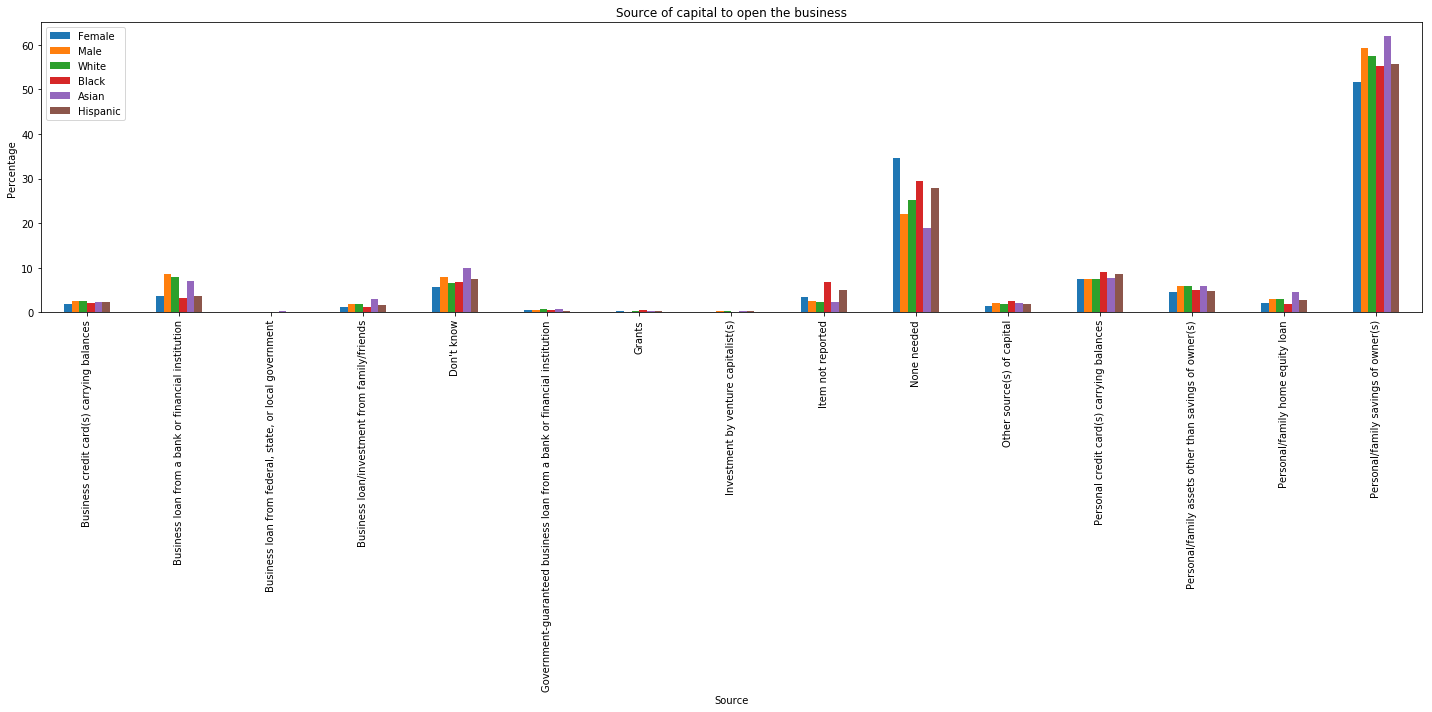

In [47]:
dfs_merged2.plot(kind = 'bar', figsize = (20,10))
plt.ylabel('Percentage')
plt.title('Source of capital to open the business')
plt.tight_layout()
plt.show()

In [48]:
# End of Dataset Source of Capital

In [49]:
# Start Dataset Ecommerce

In [50]:
df3 = pd.read_csv('Files/ecommerce.csv')
columns3 = ['Industry', 'Gender_ethnicity', 'Ecommerce_sales', 'Total_firms', 'Total_sales']
df3.columns = columns3
df3 = df3.drop(columns = 'Total_sales')
df3.head()

,Industry,Gender_ethnicity,Ecommerce_sales,Total_firms
0,Total for all sectors,All firms,All firms,27626360
1,Total for all sectors,All firms,No e-commerce sales,15787853
2,Total for all sectors,All firms,Less than 1%,175745
3,Total for all sectors,All firms,1% to 4%,177818
4,Total for all sectors,All firms,5% to 9%,122155


In [51]:
#Check data types
df3.dtypes

Industry            object
Gender_ethnicity    object
Ecommerce_sales     object
Total_firms          int64
dtype: object

In [52]:
#Create df just with all firms
new_df3 = df3.loc[df3['Industry'] == 'Total for all sectors']
new_df3 = new_df3.loc[new_df3['Gender_ethnicity'] == 'All firms']
new_df3 = new_df3.iloc[1:]
new_df3

,Industry,Gender_ethnicity,Ecommerce_sales,Total_firms
1,Total for all sectors,All firms,No e-commerce sales,15787853
2,Total for all sectors,All firms,Less than 1%,175745
3,Total for all sectors,All firms,1% to 4%,177818
4,Total for all sectors,All firms,5% to 9%,122155
5,Total for all sectors,All firms,10% to 19%,149996
6,Total for all sectors,All firms,20% to 49%,177630
7,Total for all sectors,All firms,50% to 99%,289550
8,Total for all sectors,All firms,100%,215826
9,Total for all sectors,All firms,Don't know,249092
10,Total for all sectors,All firms,Total reporting,17347429


In [53]:
#Remove all firms?
df_grouped3 = new_df3.groupby('Ecommerce_sales').sum()
df_grouped3 = df_grouped3.sort_values('Total_firms', ascending = False)
df_grouped3['Percentage'] = round(df_grouped3['Total_firms']/df_grouped3.iloc[0,0]*100,2)
df_grouped3

,Total_firms,Percentage
Ecommerce_sales,,
Total reporting,17347429,100.00
No e-commerce sales,15787853,91.01
50% to 99%,289550,1.67
Don't know,249092,1.44
100%,215826,1.24
1% to 4%,177818,1.03
20% to 49%,177630,1.02
E-commerce not reported,176157,1.02
Less than 1%,175745,1.01


In [54]:
# Need to add a percentage column after Total_firms
df_multi_gender3 = df3.set_index(['Gender_ethnicity', 'Ecommerce_sales'])
df_multi_gender3 = df_multi_gender3.loc[df_multi_gender3['Industry'] == 'Total for all sectors']
df_multi_gender3 = df_multi_gender3.drop(columns = 'Industry')
df_multi_gender3

Total_firms
Gender_ethnicity                                   Ecommerce_sales                             
All firms                                          All firms                           27626360
                                                   No e-commerce sales                 15787853
                                                   Less than 1%                          175745
                                                   1% to 4%                              177818
                                                   5% to 9%                              122155
                                                   10% to 19%                            149996
                                                   20% to 49%                            177630
                                                   50% to 99%                            289550
                                                   100%                                  215826
                                                   Don't know                            249092
                                                   Total reporting                     17347429
                                                   E-commerce not reported               176157
                                                   Percent e-commerce not reported         1764
Female-owned                                       All firms                            9878397
                                                   No e-commerce sales                  5113985
                                                   Less than 1%                           71059
                                                   1% to 4%                               68996
                                                   5% to 9%                               42252
                                                   10% to 19%                             50475
                                                   20% to 49%                             61982
                                                   50% to 99%                             97952
                                                   100%                                   79388
                                                   Don't know                             93659
                                                   Total reporting                      5680360
                                                   E-commerce not reported                66285
                                                   Percent e-commerce not reported          612
Male-owned                                         All firms                           14844597
                                                   No e-commerce sales                  8711340
                                                   Less than 1%                           78133
                                                   1% to 4%                               79810
                                                   5% to 9%                               60985
                                                   10% to 19%                             75863
                                                   20% to 49%                             87356
                                                   50% to 99%                            142919
                                                   100%                                  105083
                                                   Don't know                            118200
                                                   Total reporting                      9460736
                                                   E-commerce not reported                92833
                                                   Percent e-commerce not reported         1045
Equally male-/female-owned                         All firms                            2456386
                                                   N

In [55]:
#Female
df_female3 = df_multi_gender3.loc[pd.IndexSlice['Female-owned',:],:]
df_female3 = df_female3.iloc[1:]
df_female3 = df_female3.sort_values('Total_firms', ascending = False)
df_female3['Percentage'] = round(df_female3['Total_firms']/df_female3.iloc[0,0]*100,2)
df_female3 = df_female3.reset_index(level = 0, drop = True)
df_female3 = df_female3.sort_values('Ecommerce_sales', ascending = True)
df_female3

,Total_firms,Percentage
Ecommerce_sales,,
1% to 4%,68996,1.21
10% to 19%,50475,0.89
100%,79388,1.40
20% to 49%,61982,1.09
5% to 9%,42252,0.74
50% to 99%,97952,1.72
Don't know,93659,1.65
E-commerce not reported,66285,1.17
Less than 1%,71059,1.25


In [56]:
#Male
df_male3 = df_multi_gender3.loc[pd.IndexSlice['Male-owned',:],:]
df_male3 = df_male3.iloc[1:]
df_male3 = df_male3.sort_values('Total_firms', ascending = False)
df_male3['Percentage'] = round(df_male3['Total_firms']/df_male3.iloc[0,0]*100,2)
df_male3 = df_male3.reset_index(level = 0, drop = True)
df_male3 = df_male3.sort_values('Ecommerce_sales', ascending = True)
df_male3

,Total_firms,Percentage
Ecommerce_sales,,
1% to 4%,79810,0.84
10% to 19%,75863,0.80
100%,105083,1.11
20% to 49%,87356,0.92
5% to 9%,60985,0.64
50% to 99%,142919,1.51
Don't know,118200,1.25
E-commerce not reported,92833,0.98
Less than 1%,78133,0.83


In [57]:
#White
df_white3 = df_multi_gender3.loc[pd.IndexSlice['White',:],:]
df_white3 = df_white3.iloc[1:]
df_white3 = df_white3.sort_values('Total_firms', ascending = False)
df_white3['Percentage'] = round(df_white3['Total_firms']/df_white3.iloc[0,0]*100,2)
df_white3 = df_white3.reset_index(level = 0, drop = True)
df_white3 = df_white3.sort_values('Ecommerce_sales', ascending = True)
df_white3

,Total_firms,Percentage
Ecommerce_sales,,
1% to 4%,158926,1.08
10% to 19%,134036,0.91
100%,187686,1.28
20% to 49%,157264,1.07
5% to 9%,109271,0.75
50% to 99%,258089,1.76
Don't know,210758,1.44
E-commerce not reported,121453,0.83
Less than 1%,155357,1.06


In [58]:
#Black
df_black3 = df_multi_gender3.loc[pd.IndexSlice['Black or African American',:],:]
df_black3 = df_black3.iloc[1:]
df_black3 = df_black3.sort_values('Total_firms', ascending = False)
df_black3['Percentage'] = round(df_black3['Total_firms']/df_black3.iloc[0,0]*100,2)
df_black3 = df_black3.reset_index(level = 0, drop = True)
df_black3 = df_black3.sort_values('Ecommerce_sales', ascending = True)
df_black3

,Total_firms,Percentage
Ecommerce_sales,,
1% to 4%,6690,0.80
10% to 19%,4081,0.49
100%,6662,0.79
20% to 49%,6102,0.73
5% to 9%,4072,0.48
50% to 99%,9462,1.13
Don't know,9752,1.16
E-commerce not reported,22883,2.72
Less than 1%,8520,1.01


In [59]:
#Asian
df_asian3 = df_multi_gender3.loc[pd.IndexSlice['Asian',:],:]
df_asian3 = df_asian3.iloc[1:]
df_asian3 = df_asian3.sort_values('Total_firms', ascending = False)
df_asian3['Percentage'] = round(df_asian3['Total_firms']/df_asian3.iloc[0,0]*100,2)
df_asian3 = df_asian3.reset_index(level = 0, drop = True)
df_asian3 = df_asian3.sort_values('Ecommerce_sales', ascending = True)
df_asian3

,Total_firms,Percentage
Ecommerce_sales,,
1% to 4%,6698,0.60
10% to 19%,7596,0.68
100%,17881,1.61
20% to 49%,9920,0.89
5% to 9%,5642,0.51
50% to 99%,15843,1.43
Don't know,12841,1.16
E-commerce not reported,12535,1.13
Less than 1%,6708,0.60


In [60]:
#Hispanic
df_hispanic3 = df_multi_gender3.loc[pd.IndexSlice['Hispanic',:],:]
df_hispanic3 = df_hispanic3.iloc[1:]
df_hispanic3 = df_hispanic3.sort_values('Total_firms', ascending = False)
df_hispanic3['Percentage'] = round(df_hispanic3['Total_firms']/df_hispanic3.iloc[0,0]*100,2)
df_hispanic3 = df_hispanic3.reset_index(level = 0, drop = True)
df_hispanic3 = df_hispanic3.sort_values('Ecommerce_sales', ascending = True)
df_hispanic3

,Total_firms,Percentage
Ecommerce_sales,,
1% to 4%,7090,0.56
10% to 19%,5925,0.47
100%,11384,0.90
20% to 49%,7858,0.62
5% to 9%,5344,0.42
50% to 99%,13481,1.07
Don't know,13000,1.03
E-commerce not reported,24632,1.95
Less than 1%,6772,0.54


In [61]:
df_fem3 = df_female3.drop(columns = 'Total_firms')

df_mal3 = df_male3.drop(columns = 'Total_firms')

df_whi3 = df_white3.drop(columns = 'Total_firms')

df_bla3 = df_black3.drop(columns = 'Total_firms')

df_asi3 = df_asian3.drop(columns = 'Total_firms')

df_hisp3 = df_hispanic3.drop(columns = 'Total_firms')

dfs3 = [df_fem3, df_mal3, df_whi3, df_bla3, df_asi3, df_hisp3]

dfs_merged3 = pd.concat(dfs3, axis=1, sort=False)
columns_merged3 = ['Female', 'Male', 'White', 'Black', 'Asian', 'Hispanic']
dfs_merged3.columns = columns_merged3
dfs_merged3 = dfs_merged3[0:-1]
dfs_merged3

,Female,Male,White,Black,Asian,Hispanic
Ecommerce_sales,,,,,,
1% to 4%,1.21,0.84,1.08,0.80,0.60,0.56
10% to 19%,0.89,0.80,0.91,0.49,0.68,0.47
100%,1.40,1.11,1.28,0.79,1.61,0.90
20% to 49%,1.09,0.92,1.07,0.73,0.89,0.62
5% to 9%,0.74,0.64,0.75,0.48,0.51,0.42
50% to 99%,1.72,1.51,1.76,1.13,1.43,1.07
Don't know,1.65,1.25,1.44,1.16,1.16,1.03
E-commerce not reported,1.17,0.98,0.83,2.72,1.13,1.95
Less than 1%,1.25,0.83,1.06,1.01,0.60,0.54


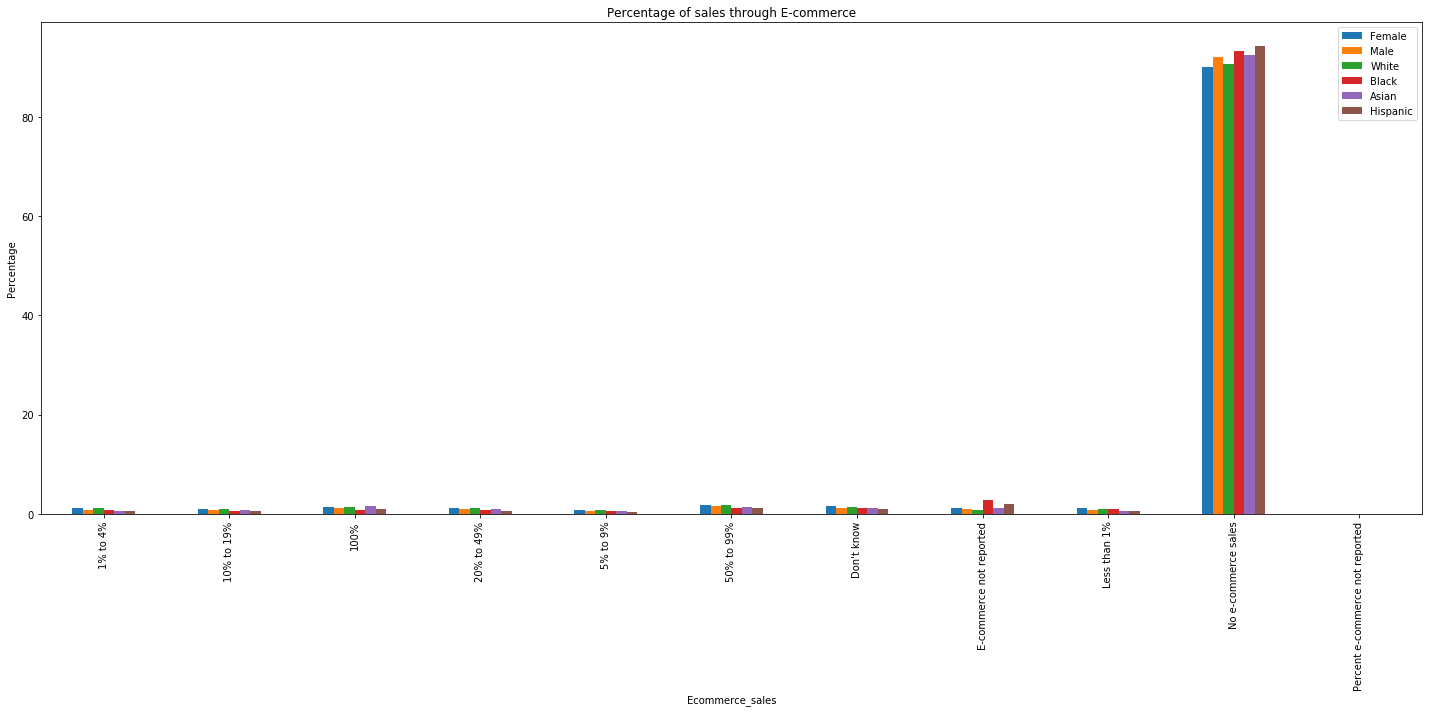

In [62]:
dfs_merged3.plot(kind = 'bar', figsize = (20,10))
plt.ylabel('Percentage')
plt.title('Percentage of sales through E-commerce')
plt.tight_layout()
plt.show()

In [63]:
# End of Dataset EComm

In [64]:
# Start Ceased_Operations

In [65]:
df4 = pd.read_csv('Files/ceased operations.csv')
columns4 = ['Industry', 'Gender_ethnicity', 'Ceased_reasons', 'Total_firms', 'Total_sales']
df4.columns = columns4
df4 = df4.drop(columns = 'Total_sales')
df4.head()

,Industry,Gender_ethnicity,Ceased_reasons,Total_firms
0,Total for all sectors,All firms,All firms,27626360
1,Total for all sectors,All firms,Business is currently operating,13754386
2,Total for all sectors,All firms,Operations ceased because owner(s) military de...,3837
3,Total for all sectors,All firms,Operations ceased because owner(s) illness or ...,206979
4,Total for all sectors,All firms,Operations ceased because owner(s) retired,438109


In [66]:
#Check data types
df4.dtypes

Industry            object
Gender_ethnicity    object
Ceased_reasons      object
Total_firms          int64
dtype: object

In [67]:
#Create df just with all firms
new_df4 = df4.loc[df4['Industry'] == 'Total for all sectors']
new_df4 = new_df4.loc[new_df4['Gender_ethnicity'] == 'All firms']
new_df4 = new_df4.iloc[1:]
new_df4


,Industry,Gender_ethnicity,Ceased_reasons,Total_firms
1,Total for all sectors,All firms,Business is currently operating,13754386
2,Total for all sectors,All firms,Operations ceased because owner(s) military de...,3837
3,Total for all sectors,All firms,Operations ceased because owner(s) illness or ...,206979
4,Total for all sectors,All firms,Operations ceased because owner(s) retired,438109
5,Total for all sectors,All firms,Operations ceased because owner(s) died,47671
6,Total for all sectors,All firms,Operations ceased because operated for a speci...,284556
7,Total for all sectors,All firms,Operations ceased due to inadequate cash flow ...,791597
8,Total for all sectors,All firms,Operations ceased due to lack of business loan...,90916
9,Total for all sectors,All firms,Operations ceased due to lack of personal loan...,54323
10,Total for all sectors,All firms,Operations ceased because owner(s) started ano...,116075


In [68]:
#Remove all firms?
df_grouped4 = new_df4.groupby('Ceased_reasons').sum()
df_grouped4 = df_grouped4.sort_values('Total_firms', ascending = False)
df_grouped4['Percentage'] = round(df_grouped4['Total_firms']/df_grouped4.iloc[0,0]*100,2)
df_grouped4

,Total_firms,Percentage
Ceased_reasons,,
Total reporting,17346886,100.00
Business is currently operating,13754386,79.29
Operations ceased for another reason,1797527,10.36
Operations ceased due to inadequate cash flow or sales,791597,4.56
Operations ceased because owner(s) retired,438109,2.53
Operations ceased because operated for a specific or one-time event,284556,1.64
Operations ceased because owner(s) illness or injury,206979,1.19
Operating status not reported,176700,1.02
Operations ceased because owner(s) sold the business,131993,0.76


In [69]:
# Need to add a percentage column after Total_firms
df_multi_gender4 = df4.set_index(['Gender_ethnicity', 'Ceased_reasons'])
df_multi_gender4 = df_multi_gender4.loc[df_multi_gender4['Industry'] == 'Total for all sectors']
df_multi_gender4 = df_multi_gender4.drop(columns = 'Industry')
df_multi_gender4

Total_firms
Gender_ethnicity                                   Ceased_reasons                                                 
All firms                                          All firms                                              27626360
                                                   Business is currently operating                        13754386
                                                   Operations ceased because owner(s) military dep...         3837
                                                   Operations ceased because owner(s) illness or i...       206979
                                                   Operations ceased because owner(s) retired               438109
                                                   Operations ceased because owner(s) died                   47671
                                                   Operations ceased because operated for a specif...       284556
                                                   Operations ceased due to inadequate cash flow o...       791597
                                                   Operations ceased due to lack of business loans...        90916
                                                   Operations ceased due to lack of personal loans...        54323
                                                   Operations ceased because owner(s) started anot...       116075
                                                   Operations ceased because owner(s) sold the bus...       131993
                                                   Operations ceased for another reason                    1797527
                                                   Total reporting                                        17346886
                                                   Operating status not reported                            176700
                                                   Reason operations ceased not reported                     25480
Female-owned                                       All firms                                               9878397
                                                   Business is currently operating                         4215931
                                                   Operations ceased because owner(s) military dep...         1066
                                                   Operations ceased because owner(s) illness or i...        80740
                                                   Operations ceased because owner(s) retired               143287
                                                   Operations ceased because owner(s) died                   13164
                                                   Operations ceased because operated for a specif...       118176
                                                   Operations ceased due to inadequate cash flow o...       306103
                                                   Operations ceased due to lack of business loans...        25372
                                                   Operations ceased due to lack of personal loans...        16092
                                                   Operations ceased because owner(s) started anot...        36863
                                                   Operations ceased because owner(s) sold the bus...        28383
                                                   Operations ceased for another reason                     819327
                                                   Total reporting                                         5679749
                                                   Operating status not reported                             66895
                                                   Reason operations ceased not reported                      8392
Male-owned                                         All firms                                              14844597
                                                   Business is currently opera

In [70]:
#Female
df_female4 = df_multi_gender4.loc[pd.IndexSlice['Female-owned',:],:]
df_female4 = df_female4.reset_index(level = 0, drop = True)
df_female4 = df_female4.sort_values('Total_firms', ascending = False)
df_female4 = df_female4.iloc[3:]
df_female4 = df_female4.sort_values('Ceased_reasons', ascending = True)

total_female4 = df_female4['Total_firms'].sum()

new_row_female4 = {'Total_firms':[total_female4]}
row_female4 = pd.DataFrame(new_row_female4, index = ['Total'])
df_female4 = df_female4.append(row_female4)
df_female4['Percentage'] = round(df_female4['Total_firms']/df_female4.iloc[-1,0]*100,2)

df_female4



,Total_firms,Percentage
Operating status not reported,66895,4.02
Operations ceased because operated for a specific or one-time event,118176,7.10
Operations ceased because owner(s) died,13164,0.79
Operations ceased because owner(s) illness or injury,80740,4.85
Operations ceased because owner(s) military deployment,1066,0.06
Operations ceased because owner(s) retired,143287,8.61
Operations ceased because owner(s) sold the business,28383,1.71
Operations ceased because owner(s) started another business,36863,2.22
Operations ceased due to inadequate cash flow or sales,306103,18.40
Operations ceased due to lack of business loans/credit,25372,1.52


In [71]:
#All Firms
df_allfirms4 = df_multi_gender4.loc[pd.IndexSlice['All firms',:],:]
df_allfirms4 = df_allfirms4.reset_index(level = 0, drop = True)
df_allfirms4 = df_allfirms4.sort_values('Total_firms', ascending = False)
df_allfirms4 = df_allfirms4.iloc[3:]
df_allfirms4 = df_allfirms4.sort_values('Ceased_reasons', ascending = True)

total_allfirms4 = df_allfirms4['Total_firms'].sum()

new_row_allfirms4 = {'Total_firms':[total_allfirms4]}
row_allfirms4 = pd.DataFrame(new_row_allfirms4, index = ['Total'])
df_allfirms4 = df_allfirms4.append(row_allfirms4)
df_allfirms4['Percentage'] = round(df_allfirms4['Total_firms']/df_allfirms4.iloc[-1,0]*100,2)

df_allfirms4

,Total_firms,Percentage
Operating status not reported,176700,4.24
Operations ceased because operated for a specific or one-time event,284556,6.83
Operations ceased because owner(s) died,47671,1.14
Operations ceased because owner(s) illness or injury,206979,4.97
Operations ceased because owner(s) military deployment,3837,0.09
Operations ceased because owner(s) retired,438109,10.52
Operations ceased because owner(s) sold the business,131993,3.17
Operations ceased because owner(s) started another business,116075,2.79
Operations ceased due to inadequate cash flow or sales,791597,19.00
Operations ceased due to lack of business loans/credit,90916,2.18


In [72]:
df_allfirms4 = df_allfirms4.drop(columns = 'Total_firms')
df_allfirms4 = df_allfirms4[0:-1]
df_allfirms4 = df_allfirms4.sort_values('Percentage', ascending = False)
df_allfirms4

,Percentage
Operations ceased for another reason,43.15
Operations ceased due to inadequate cash flow or sales,19.00
Operations ceased because owner(s) retired,10.52
Operations ceased because operated for a specific or one-time event,6.83
Operations ceased because owner(s) illness or injury,4.97
Operating status not reported,4.24
Operations ceased because owner(s) sold the business,3.17
Operations ceased because owner(s) started another business,2.79
Operations ceased due to lack of business loans/credit,2.18
Operations ceased due to lack of personal loans/credit,1.30


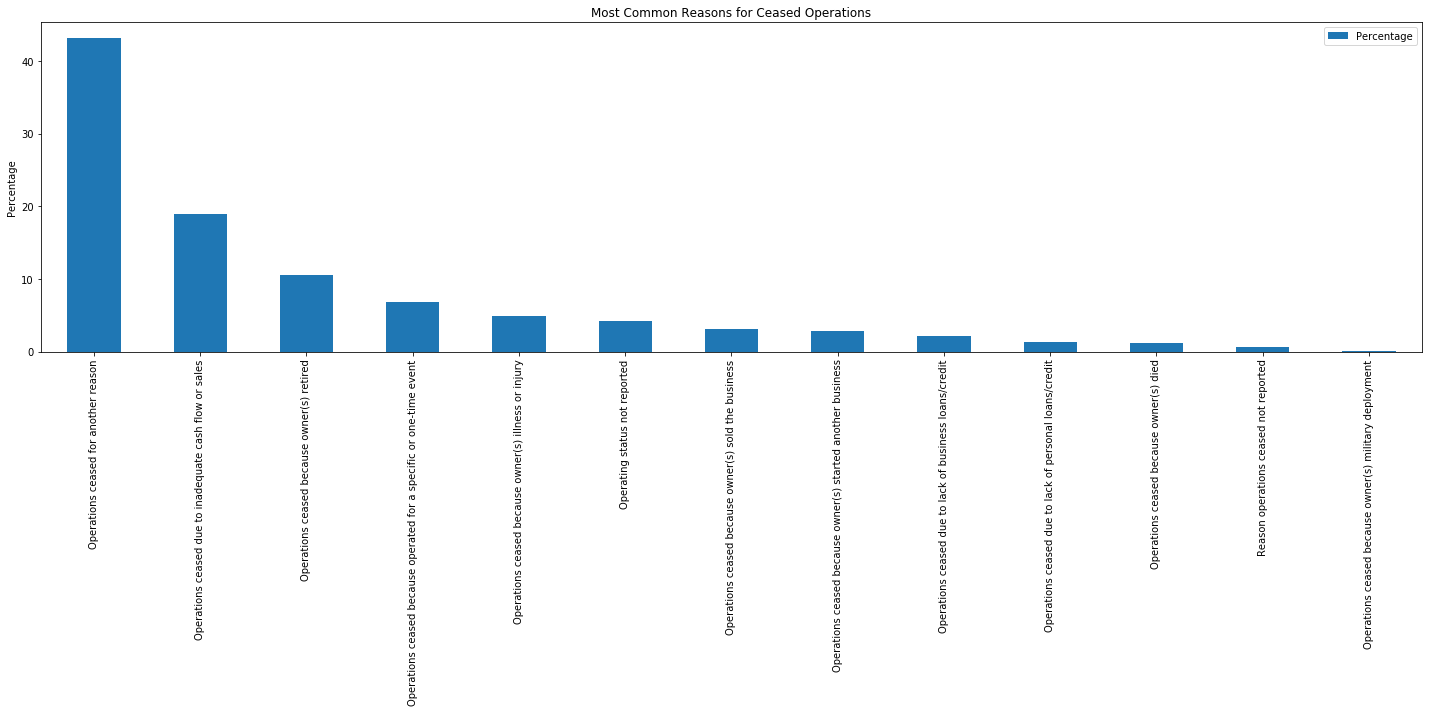

In [73]:
df_allfirms4.plot(kind = 'bar', figsize = (20,10))
plt.ylabel('Percentage')
plt.title('Most Common Reasons for Ceased Operations')
plt.tight_layout()
plt.show()

In [74]:
#Male
df_male4 = df_multi_gender4.loc[pd.IndexSlice['Male-owned',:],:]
df_male4 = df_male4.reset_index(level = 0, drop = True)
df_male4 = df_male4.sort_values('Total_firms', ascending = False)
df_male4 = df_male4.iloc[3:]
df_male4 = df_male4.sort_values('Ceased_reasons', ascending = True)

total_male4 = df_male4['Total_firms'].sum()

new_row_male4 = {'Total_firms':[total_male4]}
row_male4 = pd.DataFrame(new_row_male4, index = ['Total'])
df_male4 = df_male4.append(row_male4)
df_male4['Percentage'] = round(df_male4['Total_firms']/df_male4.iloc[-1,0]*100,2)

df_male4

,Total_firms,Percentage
Operating status not reported,92608,4.39
Operations ceased because operated for a specific or one-time event,152975,7.25
Operations ceased because owner(s) died,27813,1.32
Operations ceased because owner(s) illness or injury,107537,5.09
Operations ceased because owner(s) military deployment,2328,0.11
Operations ceased because owner(s) retired,253778,12.02
Operations ceased because owner(s) sold the business,72571,3.44
Operations ceased because owner(s) started another business,68366,3.24
Operations ceased due to inadequate cash flow or sales,402027,19.04
Operations ceased due to lack of business loans/credit,53741,2.55


In [75]:
#White
df_white4 = df_multi_gender4.loc[pd.IndexSlice['White',:],:]
df_white4 = df_white4.reset_index(level = 0, drop = True)
df_white4 = df_white4.sort_values('Total_firms', ascending = False)
df_white4 = df_white4.iloc[3:]
df_white4 = df_white4.sort_values('Ceased_reasons', ascending = True)

total_white4 = df_white4['Total_firms'].sum()

new_row_white4 = {'Total_firms':[total_white4]}
row_white4 = pd.DataFrame(new_row_white4, index = ['Total'])
df_white4 = df_white4.append(row_white4)
df_white4['Percentage'] = round(df_white4['Total_firms']/df_white4.iloc[-1,0]*100,2)

df_white4

,Total_firms,Percentage
Operating status not reported,120859,3.61
Operations ceased because operated for a specific or one-time event,230357,6.88
Operations ceased because owner(s) died,41318,1.23
Operations ceased because owner(s) illness or injury,167510,5.00
Operations ceased because owner(s) military deployment,2738,0.08
Operations ceased because owner(s) retired,396582,11.84
Operations ceased because owner(s) sold the business,100594,3.00
Operations ceased because owner(s) started another business,94726,2.83
Operations ceased due to inadequate cash flow or sales,637791,19.05
Operations ceased due to lack of business loans/credit,65349,1.95


In [76]:
#Black
df_black4 = df_multi_gender4.loc[pd.IndexSlice['Black or African American',:],:]
df_black4 = df_black4.reset_index(level = 0, drop = True)
df_black4 = df_black4.sort_values('Total_firms', ascending = False)
df_black4 = df_black4.iloc[3:]
df_black4 = df_black4.sort_values('Ceased_reasons', ascending = True)

total_black4 = df_black4['Total_firms'].sum()

new_row_black4 = {'Total_firms':[total_black4]}
row_black4 = pd.DataFrame(new_row_black4, index = ['Total'])
df_black4 = df_black4.append(row_black4)
df_black4['Percentage'] = round(df_black4['Total_firms']/df_black4.iloc[-1,0]*100,2)

df_black4

,Total_firms,Percentage
Operating status not reported,23224,6.95
Operations ceased because operated for a specific or one-time event,23146,6.92
Operations ceased because owner(s) died,2300,0.69
Operations ceased because owner(s) illness or injury,21217,6.35
Operations ceased because owner(s) military deployment,536,0.16
Operations ceased because owner(s) retired,13984,4.18
Operations ceased because owner(s) sold the business,3369,1.01
Operations ceased because owner(s) started another business,8073,2.42
Operations ceased due to inadequate cash flow or sales,75350,22.54
Operations ceased due to lack of business loans/credit,13483,4.03


In [77]:
#Asian
df_asian4 = df_multi_gender4.loc[pd.IndexSlice['Asian',:],:]
df_asian4 = df_asian4.reset_index(level = 0, drop = True)
df_asian4 = df_asian4.sort_values('Total_firms', ascending = False)
df_asian4 = df_asian4.iloc[3:]
df_asian4 = df_asian4.sort_values('Ceased_reasons', ascending = True)

total_asian4 = df_asian4['Total_firms'].sum()

new_row_asian4 = {'Total_firms':[total_asian4]}
row_asian4 = pd.DataFrame(new_row_asian4, index = ['Total'])
df_asian4 = df_asian4.append(row_asian4)
df_asian4['Percentage'] = round(df_asian4['Total_firms']/df_asian4.iloc[-1,0]*100,2)

df_asian4

,Total_firms,Percentage
Operating status not reported,13014,4.81
Operations ceased because operated for a specific or one-time event,21023,7.77
Operations ceased because owner(s) died,1877,0.69
Operations ceased because owner(s) illness or injury,8966,3.31
Operations ceased because owner(s) military deployment,293,0.11
Operations ceased because owner(s) retired,18735,6.93
Operations ceased because owner(s) sold the business,16099,5.95
Operations ceased because owner(s) started another business,10021,3.70
Operations ceased due to inadequate cash flow or sales,45193,16.71
Operations ceased due to lack of business loans/credit,5485,2.03


In [78]:
#Hispanic
df_hispanic4 = df_multi_gender4.loc[pd.IndexSlice['Hispanic',:],:]
df_hispanic4 = df_hispanic4.reset_index(level = 0, drop = True)
df_hispanic4 = df_hispanic4.sort_values('Total_firms', ascending = False)
df_hispanic4 = df_hispanic4.iloc[3:]
df_hispanic4 = df_hispanic4.sort_values('Ceased_reasons', ascending = True)

total_hispanic4 = df_hispanic4['Total_firms'].sum()

new_row_hispanic4 = {'Total_firms':[total_hispanic4]}
row_hispanic4 = pd.DataFrame(new_row_hispanic4, index = ['Total'])
df_hispanic4 = df_hispanic4.append(row_hispanic4)
df_hispanic4['Percentage'] = round(df_hispanic4['Total_firms']/df_hispanic4.iloc[-1,0]*100,2)

df_hispanic4

,Total_firms,Percentage
Operating status not reported,25024,6.22
Operations ceased because operated for a specific or one-time event,29788,7.40
Operations ceased because owner(s) died,2429,0.60
Operations ceased because owner(s) illness or injury,17551,4.36
Operations ceased because owner(s) military deployment,440,0.11
Operations ceased because owner(s) retired,18338,4.55
Operations ceased because owner(s) sold the business,6730,1.67
Operations ceased because owner(s) started another business,11092,2.75
Operations ceased due to inadequate cash flow or sales,82773,20.56
Operations ceased due to lack of business loans/credit,13001,3.23


In [79]:
df_fem4 = df_female4.drop(columns = 'Total_firms')

df_mal4 = df_male4.drop(columns = 'Total_firms')

df_whi4 = df_white4.drop(columns = 'Total_firms')

df_bla4 = df_black4.drop(columns = 'Total_firms')

df_asi4 = df_asian4.drop(columns = 'Total_firms')

df_hisp4 = df_hispanic4.drop(columns = 'Total_firms')

dfs4 = [df_fem4, df_mal4, df_whi4, df_bla4, df_asi4, df_hisp4]

dfs_merged4 = pd.concat(dfs4, axis=1, sort=False)
columns_merged4 = ['Female', 'Male', 'White', 'Black', 'Asian', 'Hispanic']
dfs_merged4.columns = columns_merged4
dfs_merged4 = dfs_merged4[0:-1]
dfs_merged4

,Female,Male,White,Black,Asian,Hispanic
Operating status not reported,4.02,4.39,3.61,6.95,4.81,6.22
Operations ceased because operated for a specific or one-time event,7.10,7.25,6.88,6.92,7.77,7.40
Operations ceased because owner(s) died,0.79,1.32,1.23,0.69,0.69,0.60
Operations ceased because owner(s) illness or injury,4.85,5.09,5.00,6.35,3.31,4.36
Operations ceased because owner(s) military deployment,0.06,0.11,0.08,0.16,0.11,0.11
Operations ceased because owner(s) retired,8.61,12.02,11.84,4.18,6.93,4.55
Operations ceased because owner(s) sold the business,1.71,3.44,3.00,1.01,5.95,1.67
Operations ceased because owner(s) started another business,2.22,3.24,2.83,2.42,3.70,2.75
Operations ceased due to inadequate cash flow or sales,18.40,19.04,19.05,22.54,16.71,20.56
Operations ceased due to lack of business loans/credit,1.52,2.55,1.95,4.03,2.03,3.23


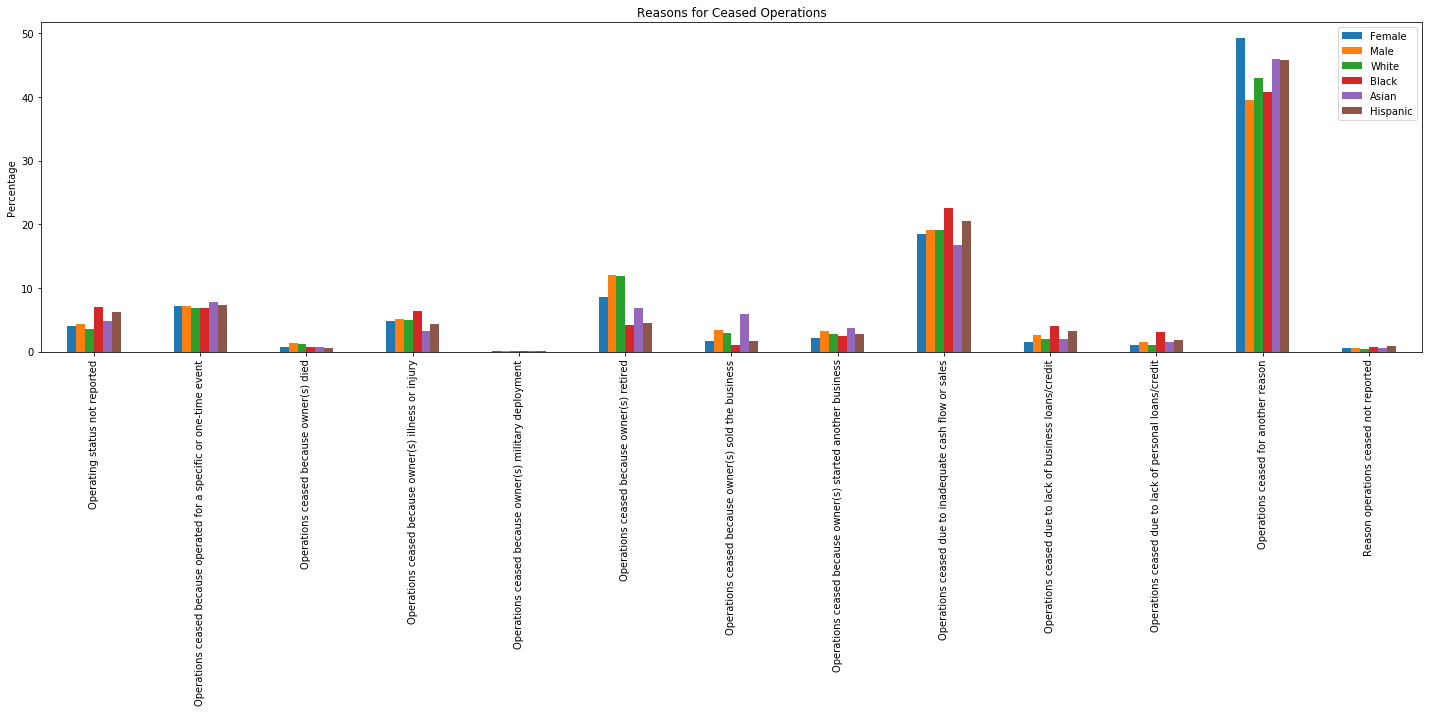

In [80]:
dfs_merged4.plot(kind = 'bar', figsize = (20,10))
plt.ylabel('Percentage')
plt.title('Reasons for Ceased Operations')
plt.tight_layout()
plt.show()

In [81]:
# End of Ceased_operations